# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        city_weather = city_weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mitu
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | anna regina
Processing Record 4 of Set 1 | kuressaare
Processing Record 5 of Set 1 | charleston
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | kefamenanu
Processing Record 8 of Set 1 | kataragama
City not found. Skipping...
Processing Record 9 of Set 1 | tongliao
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | egilsstadir
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | tocopilla
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | sao vicente
Processi

Processing Record 42 of Set 4 | inhambane
Processing Record 43 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 44 of Set 4 | jieshou
Processing Record 45 of Set 4 | yanam
Processing Record 46 of Set 4 | freetown
Processing Record 47 of Set 4 | duck lake
Processing Record 48 of Set 4 | nova sintra
Processing Record 49 of Set 4 | hotan
Processing Record 0 of Set 5 | vorkuta
Processing Record 1 of Set 5 | arkhangel'sk
Processing Record 2 of Set 5 | terenozek
Processing Record 3 of Set 5 | petropavlovsk-kamchatsky
Processing Record 4 of Set 5 | castillos
Processing Record 5 of Set 5 | vila velha
Processing Record 6 of Set 5 | sault ste. marie
Processing Record 7 of Set 5 | moissala
Processing Record 8 of Set 5 | olanchito
Processing Record 9 of Set 5 | walvis bay
Processing Record 10 of Set 5 | medzilaborce
Processing Record 11 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 12 of Set 5 | kisangani
Processing Record 13 of Set 5 | geraldton
Proces

Processing Record 33 of Set 8 | constitucion
Processing Record 34 of Set 8 | slyudyanka
Processing Record 35 of Set 8 | novyy turtkul'
Processing Record 36 of Set 8 | dalandzadgad
Processing Record 37 of Set 8 | zhangjiajie
Processing Record 38 of Set 8 | murzuq
Processing Record 39 of Set 8 | westport
Processing Record 40 of Set 8 | kamuli
Processing Record 41 of Set 8 | nola
Processing Record 42 of Set 8 | bandarbeyla
Processing Record 43 of Set 8 | namsos
Processing Record 44 of Set 8 | steinbach
Processing Record 45 of Set 8 | ayr
Processing Record 46 of Set 8 | georgetown
Processing Record 47 of Set 8 | nouadhibou
Processing Record 48 of Set 8 | taltal
Processing Record 49 of Set 8 | bannockburn
Processing Record 0 of Set 9 | cat ba
City not found. Skipping...
Processing Record 1 of Set 9 | kruisfontein
Processing Record 2 of Set 9 | safi
Processing Record 3 of Set 9 | norilsk
Processing Record 4 of Set 9 | acapulco de juarez
Processing Record 5 of Set 9 | maragogi
Processing Reco

Processing Record 24 of Set 12 | bucerias
Processing Record 25 of Set 12 | tolanaro
Processing Record 26 of Set 12 | paita
Processing Record 27 of Set 12 | ekibastuz
Processing Record 28 of Set 12 | mwanza
Processing Record 29 of Set 12 | tromso
Processing Record 30 of Set 12 | acajutla
Processing Record 31 of Set 12 | usinsk
Processing Record 32 of Set 12 | chikwawa
Processing Record 33 of Set 12 | puerto cabezas
Processing Record 34 of Set 12 | shihezi
Processing Record 35 of Set 12 | palmas
Processing Record 36 of Set 12 | chandla
Processing Record 37 of Set 12 | tomatlan
Processing Record 38 of Set 12 | las terrenas
Processing Record 39 of Set 12 | touros
Processing Record 40 of Set 12 | cloppenburg
Processing Record 41 of Set 12 | hirara
Processing Record 42 of Set 12 | changzhou
Processing Record 43 of Set 12 | shubarkuduk
Processing Record 44 of Set 12 | sungai penuh
Processing Record 45 of Set 12 | juneau
Processing Record 46 of Set 12 | pokhvistnevo
Processing Record 47 of Set

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mitu,1.1983,-70.1733,23.23,93,15,0.93,CO,1697679989
1,albany,42.6001,-73.9662,11.24,89,79,0.97,US,1697680228
2,anna regina,7.2644,-58.5077,27.86,78,59,3.33,GY,1697680268
3,kuressaare,58.2481,22.5039,0.53,93,20,1.54,EE,1697680269
4,charleston,32.7766,-79.9309,14.45,89,0,2.06,US,1697680140


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mitu,1.1983,-70.1733,23.23,93,15,0.93,CO,1697679989
1,albany,42.6001,-73.9662,11.24,89,79,0.97,US,1697680228
2,anna regina,7.2644,-58.5077,27.86,78,59,3.33,GY,1697680268
3,kuressaare,58.2481,22.5039,0.53,93,20,1.54,EE,1697680269
4,charleston,32.7766,-79.9309,14.45,89,0,2.06,US,1697680140


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

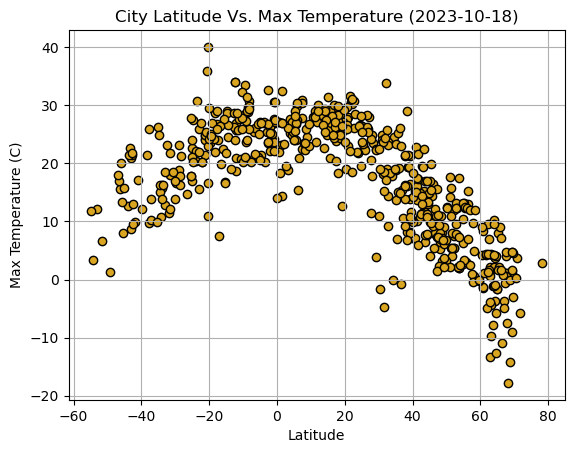

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
           edgecolor="black", color = 'goldenrod',
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

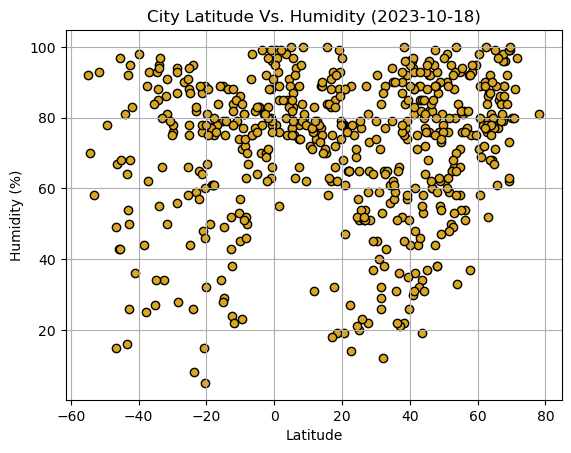

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
           edgecolor="black", color = 'goldenrod',
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

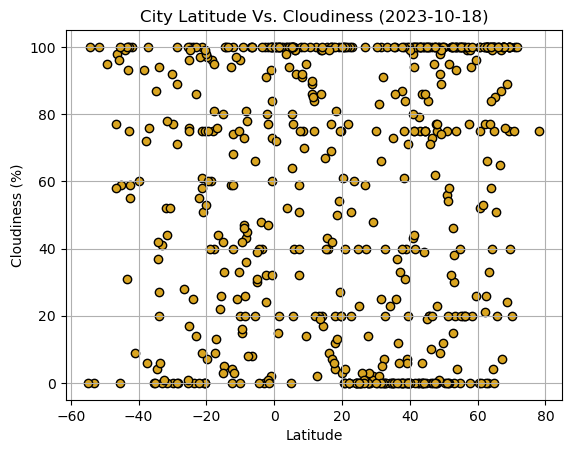

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
           edgecolor="black", color = 'goldenrod',
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

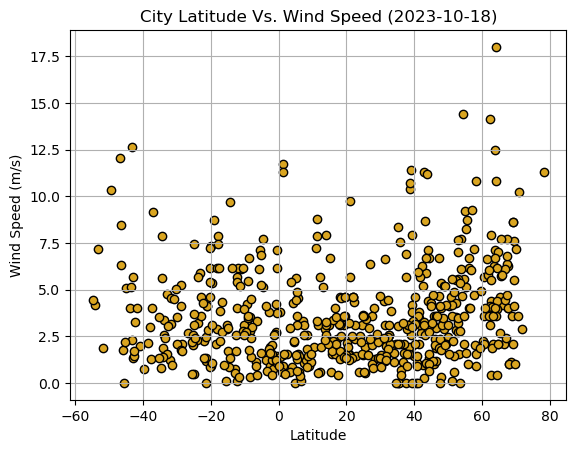

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
           edgecolor="black", color = 'goldenrod',
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mitu,1.1983,-70.1733,23.23,93,15,0.93,CO,1697679989
1,albany,42.6001,-73.9662,11.24,89,79,0.97,US,1697680228
2,anna regina,7.2644,-58.5077,27.86,78,59,3.33,GY,1697680268
3,kuressaare,58.2481,22.5039,0.53,93,20,1.54,EE,1697680269
4,charleston,32.7766,-79.9309,14.45,89,0,2.06,US,1697680140


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,blackmans bay,-43.0167,147.3167,20.85,54,100,1.34,AU,1697680269
6,kefamenanu,-9.4467,124.4781,33.56,23,15,4.23,ID,1697680269
8,adamstown,-25.0660,-130.1015,22.67,75,17,0.50,PN,1697680269
9,bengkulu,-3.8004,102.2655,26.97,70,48,1.21,ID,1697680269
16,tocopilla,-22.0920,-70.1979,20.29,65,55,2.25,CL,1697680270


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8453019376100191


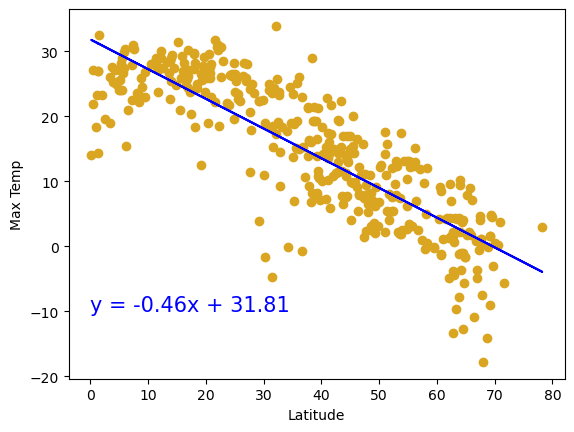

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values, color = 'goldenrod')
plt.plot(x_values, regress_values, "blue")
plt.annotate(line_eq,(0,-10),fontsize=12,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is 0.6634269406515697


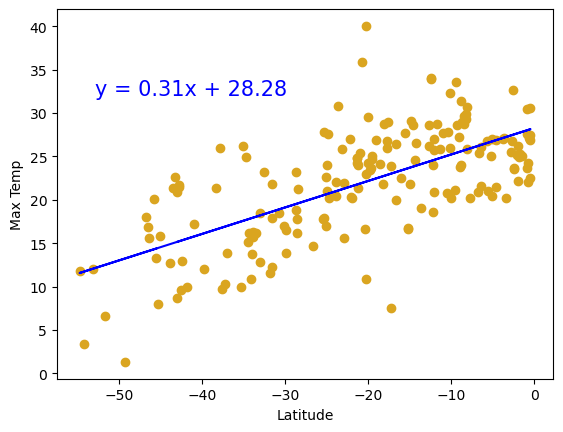

In [19]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values, color = 'goldenrod')
plt.plot(x_values, regress_values, "blue")
plt.annotate(line_eq,(-53,32),fontsize=12,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

Discussion about the linear relationship: 

For the northern hemisphere there is a pretty strong negative corrrelation. This means as the latitude goes up, the temp goes down. We can also use the r score, which is -0.8453019376100191, to determine the correlation. -.85 is a strong negative correlation. 

For the souther hemisphere there is a decently strong positive corrrelation. This means as the latitude goes up, the temp goes up. We can also use the r score, which is 0.6634269406515697, to determine the correlation. .66 is a decently strong positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.06600142423069504


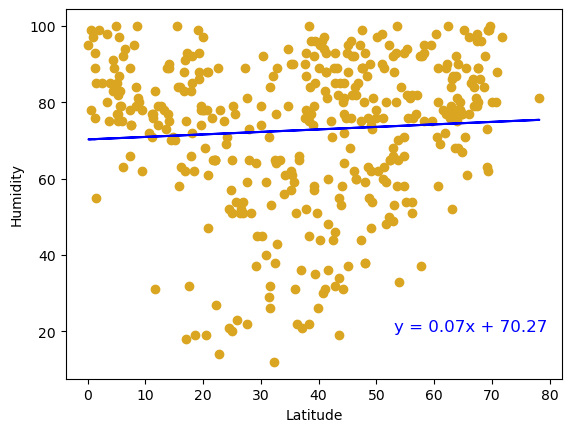

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values,color = 'goldenrod')
plt.plot(x_values, regress_values, "blue")
plt.annotate(line_eq,(53,20),fontsize=12,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is 0.13020263627118273


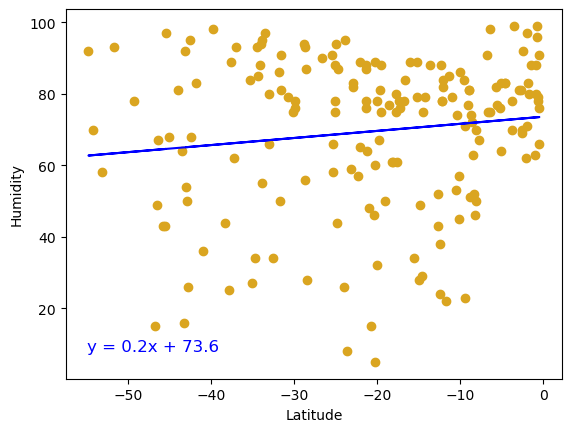

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values,color = 'goldenrod')
plt.plot(x_values, regress_values, "blue")
plt.annotate(line_eq,(-55,8),fontsize=12,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

Discussion about the linear relationship: 

For both hemisphere's there is not really a correlation. We can tell just by looking at the graphs. We can see that the data looks random, as there is no line within the actually data points. We can also determine this by looking at the r-score. For the northern hemisphere the r-score is 0.06600142423069504 and for the southern hemisphere the r-score is 0.13020263627118273. Both of these r-scores tell us there is not really a correlation, as a score above .5 or below -.5 is needed for a correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0824181961439402


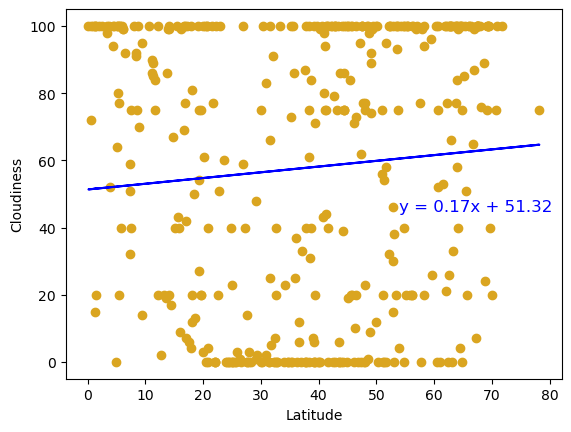

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values,color = 'goldenrod')
plt.plot(x_values, regress_values, "blue")
plt.annotate(line_eq,(54,45),fontsize=12,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is -0.04931717346546185


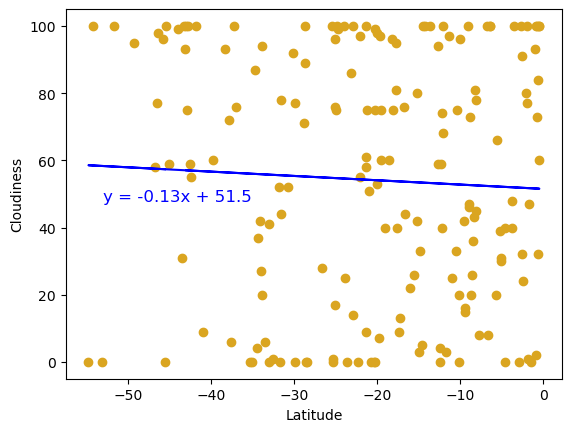

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values,color = 'goldenrod')
plt.plot(x_values, regress_values, "blue")
plt.annotate(line_eq,(-53,48),fontsize=12,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

Discussion about the linear relationship:

For both hemisphere's there is not really a correlation. We can tell just by looking at the graphs. We can see that the data looks random, as there is no line within the actually data points. We can also determine this by looking at the r-score. For the northern hemisphere the r-score is 0.0824181961439402 and for the southern hemisphere the r-score is -0.04931717346546185. Both of these r-scores tell us there is not really a correlation, as a score above .5 or below -.5 is needed for a correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.3059297482158887


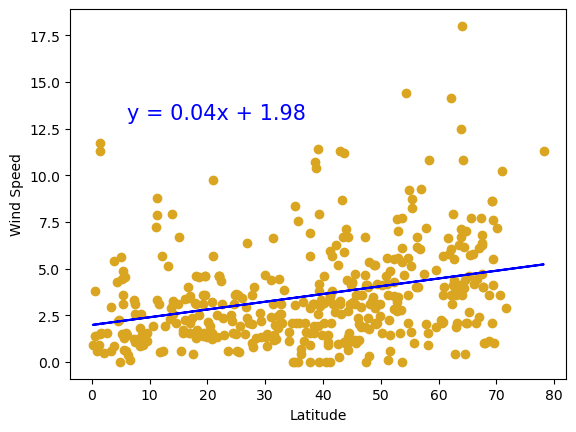

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values,color = 'goldenrod')
plt.plot(x_values, regress_values, "blue")
plt.annotate(line_eq,(6,13),fontsize=12,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.15715150981535864


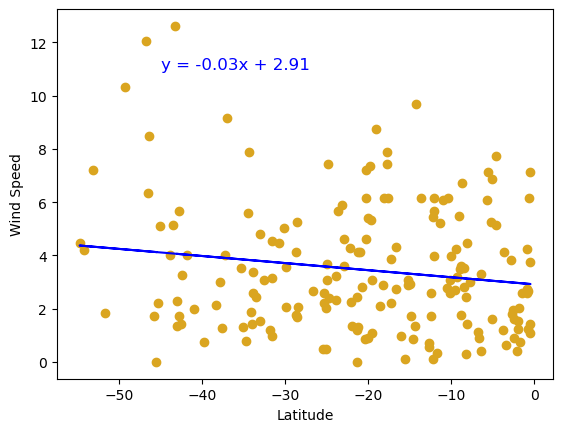

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values,color = 'goldenrod')
plt.plot(x_values, regress_values, "blue")
plt.annotate(line_eq,(-45,11),fontsize=12,color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

Discussion about the linear relationship:

For both hemisphere's there is not really a correlation. We can tell just by looking at the graphs. We can see that the data looks random, as there is no line within the actually data points. We can also determine this by looking at the r-score. For the northern hemisphere the r-score is 0.3059297482158887 and for the southern hemisphere the r-score is -0.15715150981535864. Both of these r-scores tell us there is not really a correlation, as a score above .5 or below -.5 is needed for a correlation. What we can tell is that there are a few cities in the northern hemisphere that get a lot higher winds than any city in the southern hemisphere. In the norther hemisphere there are two cities with wind speeds above 12.5, however in the southern hemisphere there are hardly one city above 12. 